<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch8_SocialNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
got = pd.read_csv("/content/drive/MyDrive/BI BA Handbook/Chapter 8/GOT1.csv")

In [ ]:
got.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
GOT = nx.from_pandas_edgelist(got, source='Source', target='Target', edge_attr='weight' )

In [ ]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())

In [ ]:
pos = nx.spring_layout(GOT,weight='weight',iterations=20, k = 4)

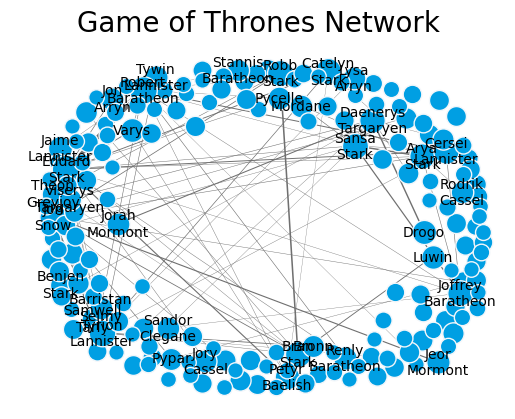

In [ ]:
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 20)


for node in GOT.nodes():
    size = 100*weighted_degrees[node]**0.2
    ns = nx.draw_networkx_nodes(GOT,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(GOT,pos,{n:n.replace('-','\n') for n in GOT.nodes() if weighted_degrees[n]>100},font_size=10);

for e in GOT.edges(data=True):
    if e[2]['weight']>20:
        nx.draw_networkx_edges(GOT,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

In [ ]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])

In [ ]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

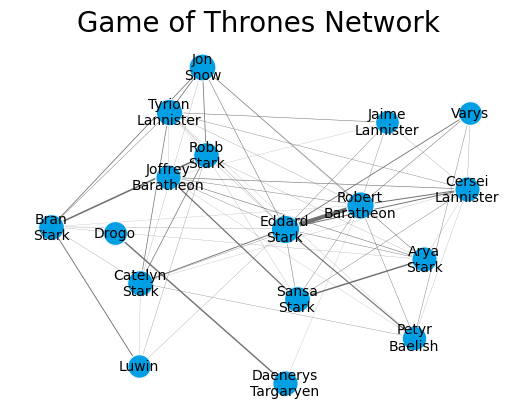

In [ ]:
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 20)


for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.2
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>50},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

Code from Harsh Jobanputra at https://github.com/harsh2201

In [ ]:
def independent_cascade(G,t,infection_times):
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['weight'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1
    return infection_times

In [ ]:
def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.title('Game of Thrones Network, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#ff0000')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['weight']>10:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

Spread of Information

In [ ]:
infection_times = {'Jon-Snow':-1,'Eddard-Stark':0,'Robert-Baratheon':0}

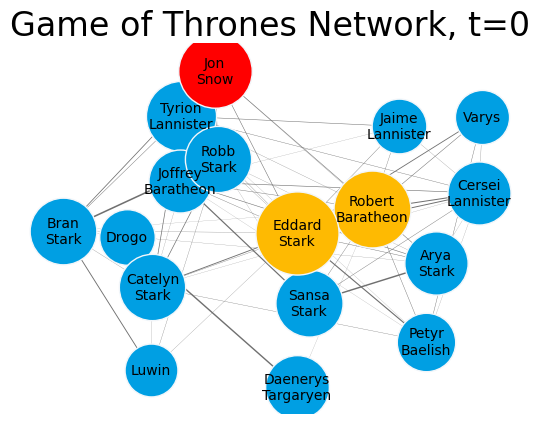

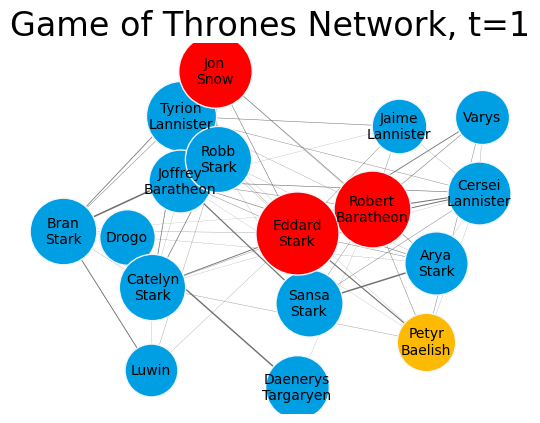

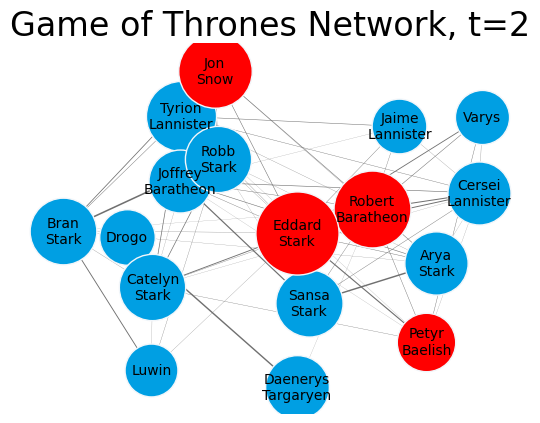

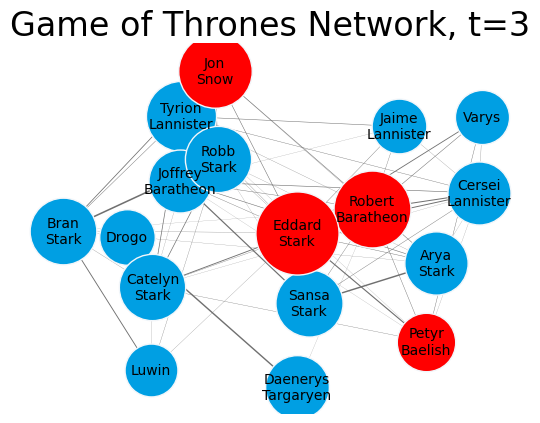

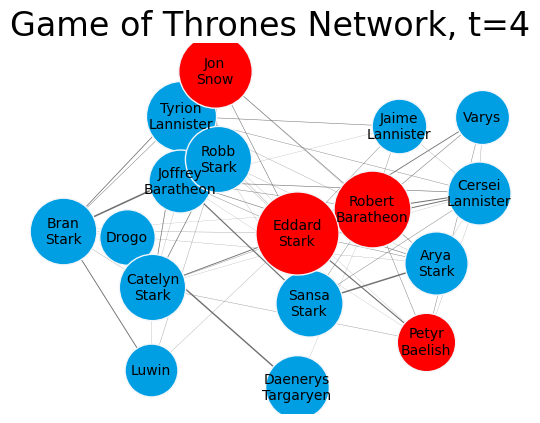

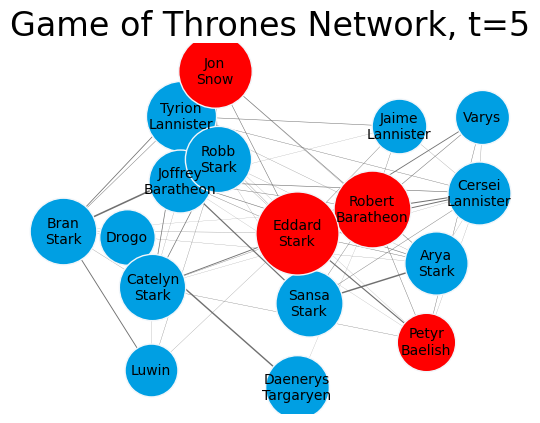

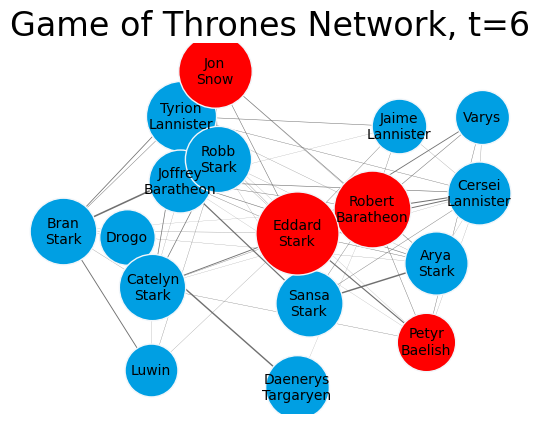

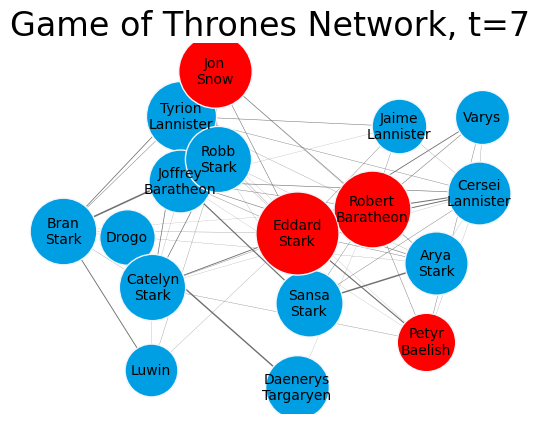

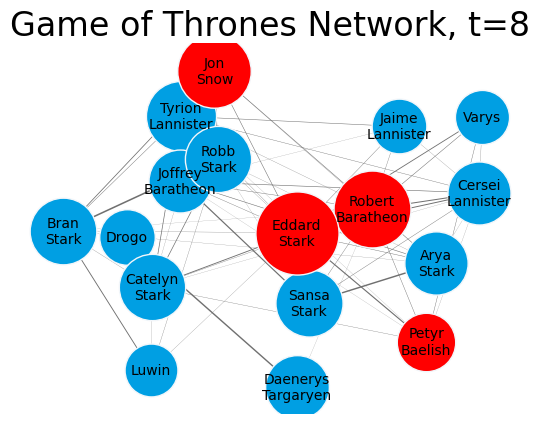

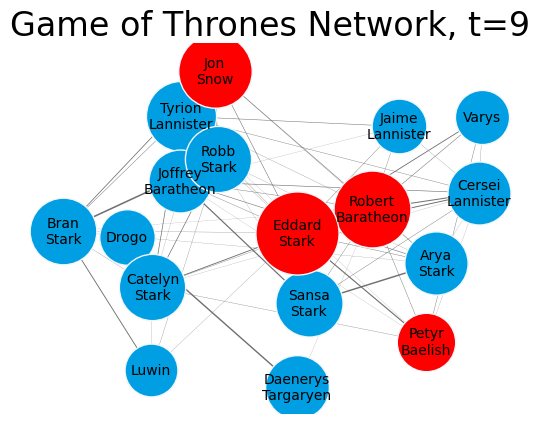

In [ ]:
for t in range(10):
    plot_G(subG,pos,infection_times,t)
    infection_times = independent_cascade(subG,t,infection_times)

## Degree of Centrality

In [ ]:
cen = nx.degree_centrality(subG)
cen

{'Tyrion-Lannister': 0.8125,
 'Robert-Baratheon': 0.9375,
 'Joffrey-Baratheon': 0.8125,
 'Bran-Stark': 0.75,
 'Arya-Stark': 0.625,
 'Drogo': 0.125,
 'Luwin': 0.375,
 'Catelyn-Stark': 0.875,
 'Jon-Snow': 0.6875,
 'Cersei-Lannister': 0.75,
 'Petyr-Baelish': 0.6875,
 'Robb-Stark': 0.6875,
 'Daenerys-Targaryen': 0.25,
 'Jaime-Lannister': 0.625,
 'Sansa-Stark': 0.8125,
 'Eddard-Stark': 0.9375,
 'Varys': 0.625}

In [ ]:
dfcen = pd.DataFrame(cen, columns=["names", "values"]).sort_values(by='values', ascending=False)

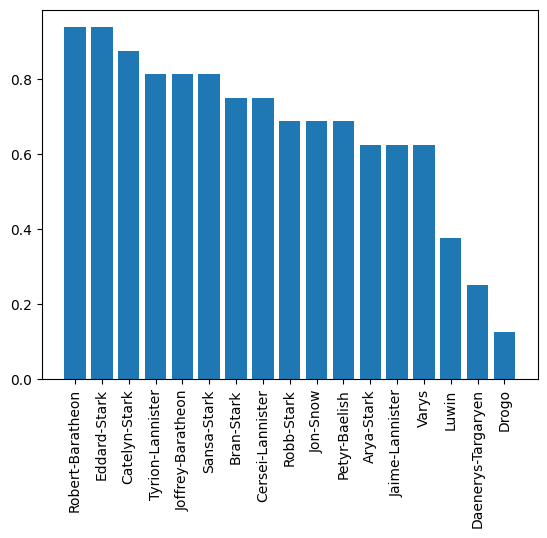

In [ ]:
plt.bar(dfcen["names"], dfcen["values"])
plt.xticks(rotation=90)
plt.show()

## Eigenvector Centrality

In [ ]:
eig = nx.eigenvector_centrality_numpy(subG)
eig

{'Tyrion-Lannister': 0.278531430438706,
 'Robert-Baratheon': 0.2936650631764839,
 'Joffrey-Baratheon': 0.28575577036672367,
 'Bran-Stark': 0.26183615148535194,
 'Arya-Stark': 0.22955480115391497,
 'Drogo': 0.030742899202730326,
 'Luwin': 0.13664191630963285,
 'Catelyn-Stark': 0.296380213397321,
 'Jon-Snow': 0.24253199075972406,
 'Cersei-Lannister': 0.2671303555348801,
 'Petyr-Baelish': 0.24827254536567064,
 'Robb-Stark': 0.23954313344761496,
 'Daenerys-Targaryen': 0.07097922618937116,
 'Jaime-Lannister': 0.22869039312683195,
 'Sansa-Stark': 0.28575577036672367,
 'Eddard-Stark': 0.3018991256416136,
 'Varys': 0.21558389053928134}

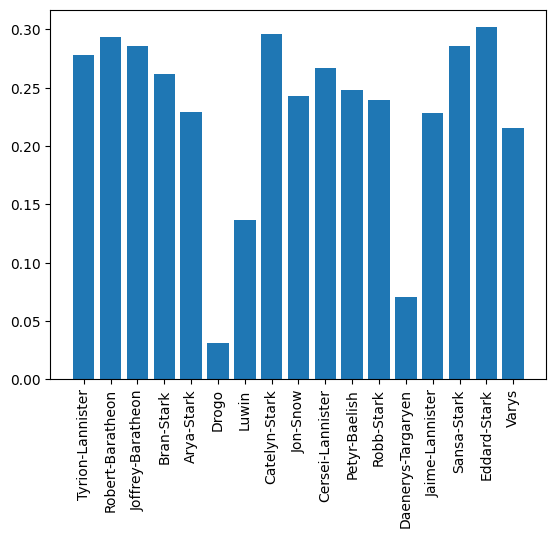

In [ ]:
plt.bar(eig.keys(), eig.values())
plt.xticks(rotation=90)
plt.show()

## Betweenness Centrality

In [ ]:
bet = nx.betweenness_centrality(subG)
bet

{'Tyrion-Lannister': 0.022043650793650796,
 'Robert-Baratheon': 0.1543948412698413,
 'Joffrey-Baratheon': 0.011140873015873017,
 'Bran-Stark': 0.014292328042328042,
 'Arya-Stark': 0.0026851851851851854,
 'Drogo': 0.0,
 'Luwin': 0.0,
 'Catelyn-Stark': 0.026775793650793647,
 'Jon-Snow': 0.010357142857142856,
 'Cersei-Lannister': 0.008191137566137567,
 'Petyr-Baelish': 0.0050330687830687825,
 'Robb-Stark': 0.012949735449735447,
 'Daenerys-Targaryen': 0.009523809523809523,
 'Jaime-Lannister': 0.0029497354497354496,
 'Sansa-Stark': 0.011140873015873017,
 'Eddard-Stark': 0.07241071428571429,
 'Varys': 0.01944444444444444}

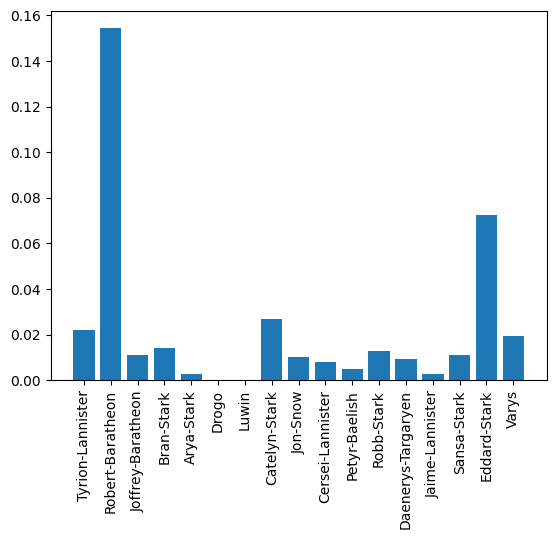

In [ ]:
plt.bar(bet.keys(), bet.values())
plt.xticks(rotation=90)
plt.show()

## Closeness Centrality

In [ ]:
clos = nx.closeness_centrality(subG)
clos

{'Tyrion-Lannister': 0.8421052631578947,
 'Robert-Baratheon': 0.9411764705882353,
 'Joffrey-Baratheon': 0.8421052631578947,
 'Bran-Stark': 0.8,
 'Arya-Stark': 0.7272727272727273,
 'Drogo': 0.5161290322580645,
 'Luwin': 0.5925925925925926,
 'Catelyn-Stark': 0.8888888888888888,
 'Jon-Snow': 0.7619047619047619,
 'Cersei-Lannister': 0.8,
 'Petyr-Baelish': 0.7619047619047619,
 'Robb-Stark': 0.7619047619047619,
 'Daenerys-Targaryen': 0.5714285714285714,
 'Jaime-Lannister': 0.7272727272727273,
 'Sansa-Stark': 0.8421052631578947,
 'Eddard-Stark': 0.9411764705882353,
 'Varys': 0.7272727272727273}

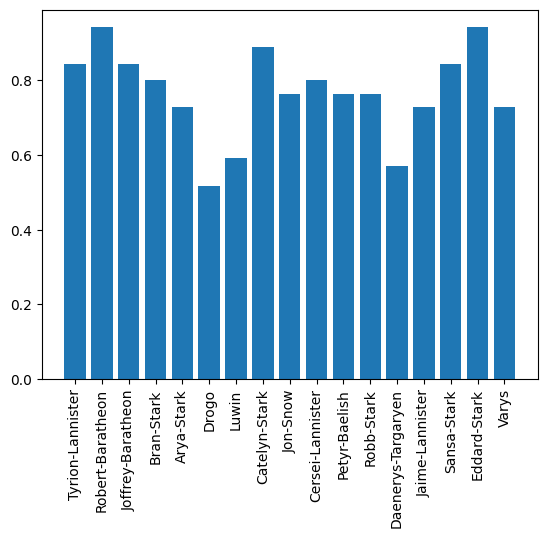

In [ ]:
plt.bar(clos.keys(), clos.values())
plt.xticks(rotation=90)
plt.show()